# Image Enhancement using pixelwise operators
This notebook shows how to enhance images by transforming the pixel values of some input image, into new pixel values producing a better output image.

In [164]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
import random

Pixelwise operations transform input pixels $z$ that are within some intensity level interval, such as $[0,255]$, into an output pixel $s$.

To ilustrate different operators, let us create an array with the 256 possible graylevels and work with that to show different types of transformations.

In [165]:
z = np.arange(256)

## Pixel-wise, or point operators

Transform the valeu $z$ of some input pixel in a new value $s$ via a transformation of the graylevel interval, e.g. 0 to 255. This can be written as:
$$s=T(z)$$

For instance, the identity transformation copies the values, without transformation, i.e.: $$s=T(z)=z$$

The inversion or negative transformation, is given by: $$s=T(z)=255-z$$

In [166]:
s_ident = z
s_inver = 255 - z

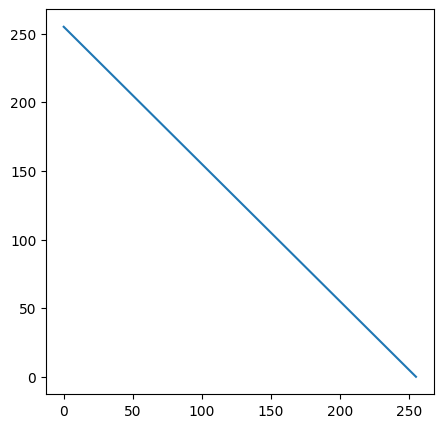

In [167]:
plt.figure(figsize=(5,5))
plt.plot(z, s_inver)

In [168]:
# Load the images to perform the inversion 
img1 = imageio.v2.imread("img1.png")

# Perform the transformation
img1_invert = 255 - img1

(-0.5, 639.5, 426.5, -0.5)

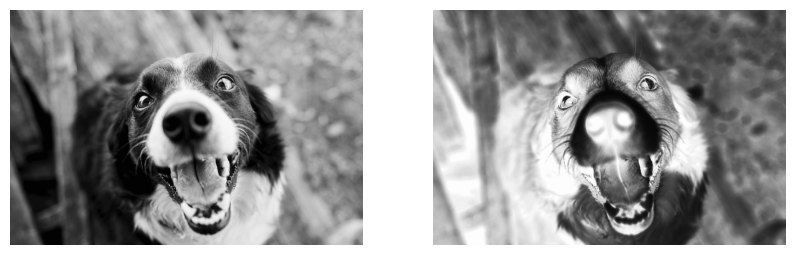

In [169]:
plt.figure(figsize=(10,10))

# Defines a panel to show the images side by side
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(img1_invert, cmap="gray")
plt.axis('off')

## Logarithmic enhancement
Mathematical functions are useful to enhance images.

The $log$ function in particular decreases the dynamic range between the gray levels so that the dark pixels become more bright, while not oversaturating the already bright pixels.

However, it is important to find a log-based transformation to map values between 0 and 255 to values also in the same range. If we just apply a log, for example, using base 2: $$s=log_2(z)$$

assuming $$z=128$$

we would have: $$s=log_2(128)=7$$

which decreased the dynamic range of the gray levels too much and would hamper visualization.

Let us plot this.

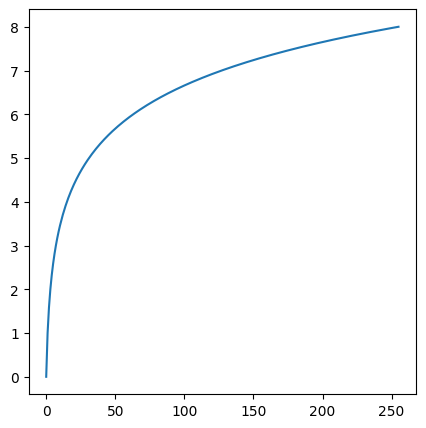

In [170]:
z_log2 = np.log2(z + 1)
plt.figure(figsize=(5,5))
plt.plot(z, z_log2)

We need correction factor to rescale the output into the desired one. This factor is defined as: $$\frac{L}{log_2(1+L)}$$
in which $L$ is the maximum gray levels in the rescaled image, e.g. 255.

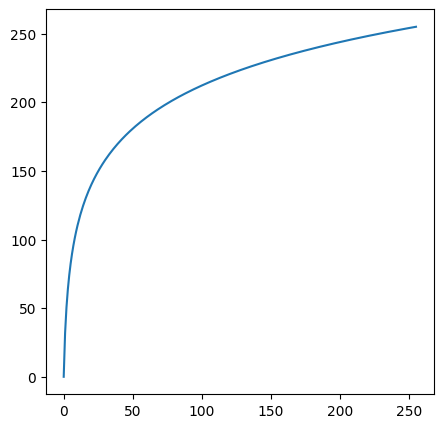

In [171]:
# Scale factor
c_scale = 255 / (np.log2(1 + 255))

# Log scaled
z_log2 = c_scale * np.log2(z + 1)
plt.figure(figsize=(5,5))
plt.plot(z, z_log2)

Applying to the image now.

In [172]:
img3 = imageio.v2.imread("img1.png")

img3_log2 = (c_scale * np.log2(1 + img3.astype(np.int32))).astype(np.uint8)

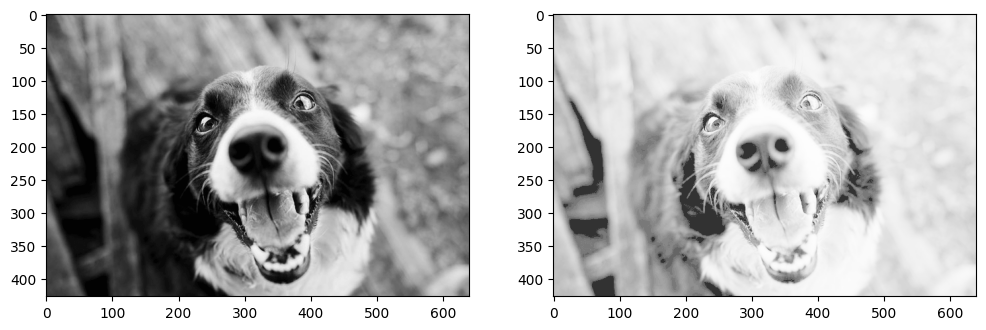

In [173]:
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(img3, cmap='gray')

plt.subplot(122)
plt.imshow(img3_log2, cmap='gray')

## Thresholding
Often applied as a simple segmentation method, it is a step function that outputs only two values, relative to pixels outside or within regions of interest.

In [174]:
# Defining some arbitrary threshold T
T = 100

# The where function returns all coordinates mathcing the conditional
indL = np.where(img1 > T)

# Create a new image with the same size of the input
img1_thresh = np.zeros(img1.shape)

# Assign 1 to all pixels above the threshold value
img1_thresh[indL] = 1

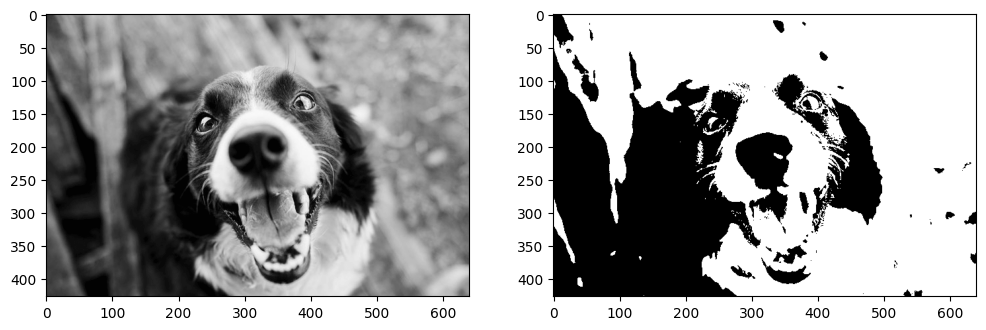

In [175]:
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(img1, cmap='gray')

plt.subplot(122)
plt.imshow(img1_thresh, cmap='gray')

## Gamma curve correction
Adjust the graylevels using a power transformation. This is useful to adjust the display, so that it better suits the human vision light perception curve.

This transformation is given by: $$s=T(z)=r^γ$$

Note, again that we need to make sure the output matches the range of graylevels. In this case we are going to first normalize the pixels to 0-1 interval, and then reescale to 0-255 as follows.

To illustrate, let us also visualize the transformation curve for multiples values of $γ$.

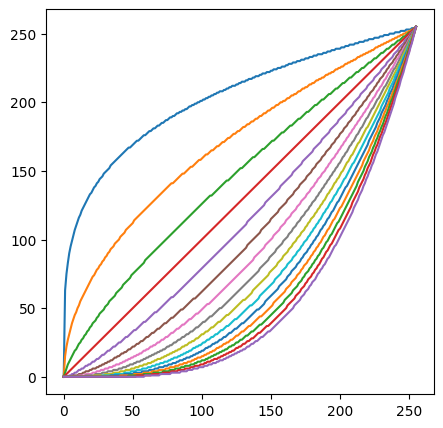

In [176]:
# Max graylevel
R = 255.00

plt.figure(figsize=(5,5))

# Plotting the gamma adjustment function for different gamma values: between 0.25 and 3
for gamma in np.arange(0.25, 4, 0.25):
    z_gamma = (R * np.power(z / R, gamma)).astype(np.uint8)
    plt.plot(z, z_gamma)

Note that for $γ<1$ it may have effects that is similar to a logarithmic function (increase the dynamic range of dark pixels) as for the orange curve that shows the square root transformation (gamma=0.5), or instead, for $γ>1$, increase the dynamic range of bright pixels.

## Logistic function
Enhances contrast using sigmoid logistic function, that has as "S" shape.
The parameter k controls the smoothness of the function.

In [177]:
k = 0.025
s_sigmoid = (255 / (1 + np.exp(-k * (z - 127)))).astype(np.uint8)

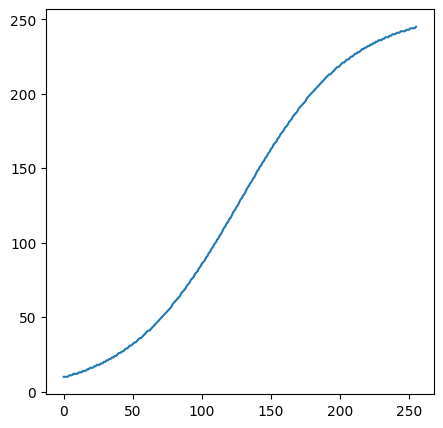

In [178]:
plt.figure(figsize=(5,5))
plt.plot(z, s_sigmoid)

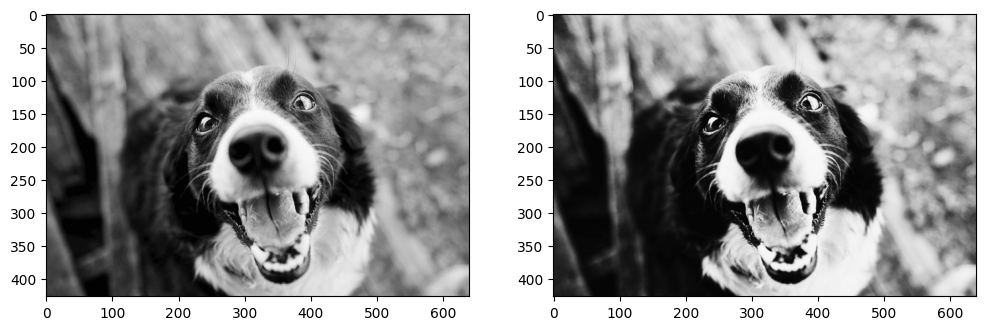

In [179]:
k = 0.03
img1_sigm = (255 / (1 + np.exp(-k * (img1.astype(np.int32) - 127)))).astype(np.uint8)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img1_sigm, cmap='gray')

## Bit place slicing
We can slice the graylevels in terms of the bits contained in each one of the 8 positions. This may reveal interesting information to better understand where are the most relevant data, and to understand the noise that is often contained in the least significant bits.

(-0.5, 639.5, 426.5, -0.5)

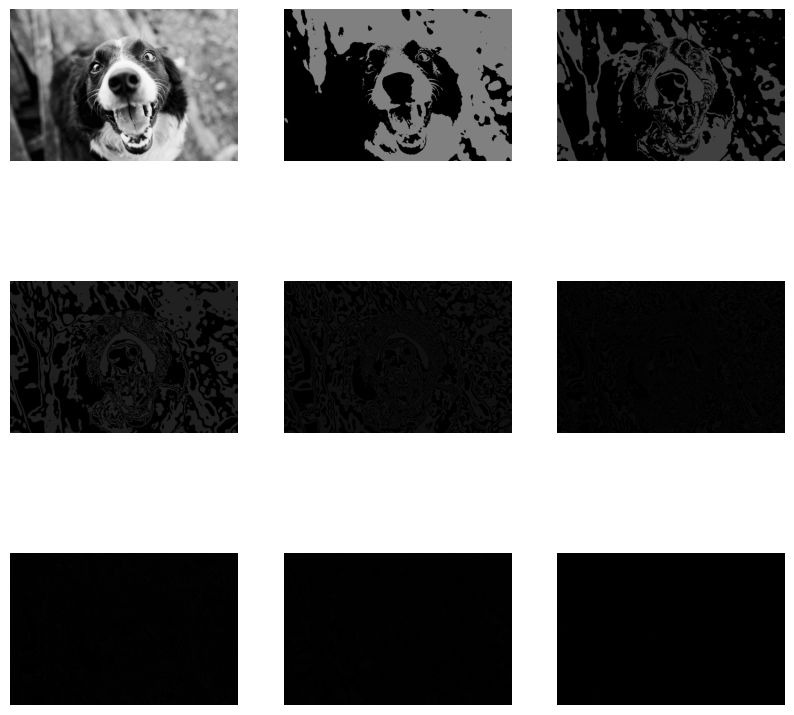

In [180]:
plt.figure(figsize=(10,10))

# Bitwise operator AND using mask defined by the bits below
img1_b1 = img1 & 0b10000000
img1_b2 = img1 & 0b01000000
img1_b3 = img1 & 0b00100000
img1_b4 = img1 & 0b00010000
img1_b5 = img1 & 0b00001000
img1_b6 = img1 & 0b00000100
img1_b7 = img1 & 0b00000010
img1_b8 = img1 & 0b00000001

plt.subplot(331)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(332)
plt.imshow(img1_b1, cmap='gray')
plt.axis('off')

plt.subplot(333)
plt.imshow(img1_b2, cmap='gray')
plt.axis('off')

plt.subplot(334)
plt.imshow(img1_b3, cmap='gray')
plt.axis('off')

plt.subplot(335)
plt.imshow(img1_b4, cmap='gray')
plt.axis('off')

plt.subplot(336)
plt.imshow(img1_b5, cmap='gray')
plt.axis('off')

plt.subplot(337)
plt.imshow(img1_b6, cmap='gray')
plt.axis('off')

plt.subplot(338)
plt.imshow(img1_b7, cmap='gray')
plt.axis('off')

plt.subplot(339)
plt.imshow(img1_b8, cmap='gray')
plt.axis('off')

# Image Enhancement using histograms

Instead of performing image enhancement with arbitrary transformations of each pixel value (in which the value is the only input of the transformation), it is possible to design transformations by using the image information. A widely employed technique in that sense is the histogram-based enhancement, that uses the image histogram as a source of information about the intensity distribution over the image.

The histogram is computed by counting how many times each intensity level appears in the image.

In [181]:
# Below a matrix 5x5 containing random values between 0 and 7
A = np.random.randint(0,8,[5,5])

A fairly simple way to compute the histogram (although there are more optimized ways to do that), is to loop through all intensity/graylevel values, and check how many pixels in the matrix has each value.

 Note that this is faster than looping through all pixels of the image.

In [182]:
def histogram(A, no_levels):
    N = A.shape[0]
    M = A.shape[1]

    hist = np.zeros(no_levels).astype(int)

    for i in range(no_levels):
        npixel_value_i = np.sum(A == i)
        hist[i] = npixel_value_i

    return hist    

In [183]:
hist_A = histogram(A, 8)
print(hist_A)

[6 0 3 2 1 4 5 4]


Text(0, 0.5, 'Frequency')

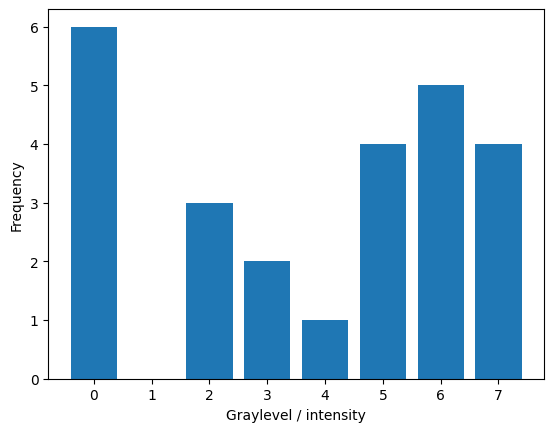

In [184]:
plt.bar(range(8), hist_A)
plt.xlabel('Graylevel / intensity')
plt.ylabel('Frequency')

Let's apply this function to compute the histogram of a real image and show their plots. Note how the graylevels are distributed according to the different brightness and contrast characteristics of each image.

Text(0, 0.5, 'Frequency')

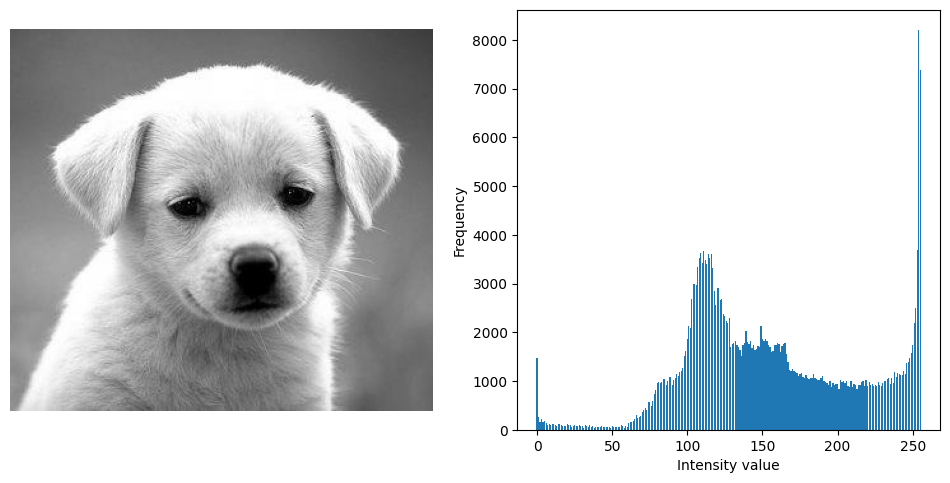

In [185]:
img2 = imageio.v2.imread("img2.png")

hist_img2 = histogram(img2, 256)

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

We can use a method known as Histogram Equalisation, that uses the cumulative histogram as a function to transform the pixel values and enhance the image. The basic technique for equalisation is designed so that to distribute as uniform as possible the pixels along all range of possible grayvalues.

After computing the cumulative histogram, in order to make it a proper transformation function, we have to scale it (as done with the log transformation, for example) to allow an output in the interval of 0 - 255.

The transformation, for each pixel r is given by: $$s=T(r)=\frac{L-1}{MN}hc(r)$$

where $hc$ is the cumulative histogram and $hc(r)$ is the value of the cumulative histogram evaluated at the intensity level r

In [186]:
def histogram_equalization(A, no_levels):
    A = A[:,:,0]
    hist = histogram(A, no_levels)

    # Cumulative histogram
    histC = np.zeros(no_levels).astype(int)
    
    histC[0] = hist[0]
    for i in range(1, no_levels):
        histC[i] = hist[i] + histC[i-1]

    # Store the lookup table (tranfer function)
    hist_transf = np.zeros(no_levels).astype(np.uint8)

    N = A.shape[0]
    M = A.shape[1]

    # Create the img to store the equalized version
    A_eq = np.zeros([N,M]).astype(np.uint8)

    # Loop through every intensity value possible and tranform all those (z) in the image
    for z in range(no_levels):
        s = ((no_levels - 1) / float(M * N)) * histC[z]
        hist_transf[z] = s

        # For every coordinate in which A == z, replace it with s
        A_eq[np.where(A == z)] = s

    
    return (A_eq, hist_transf)

Let's equalize the image. Note that after processing, the histograms are more uniformly distributed over the possible graylevel range of values.

In [187]:
img2_eq, img2_transf = histogram_equalization(img2, 256)

Text(0, 0.5, 'Frequency')

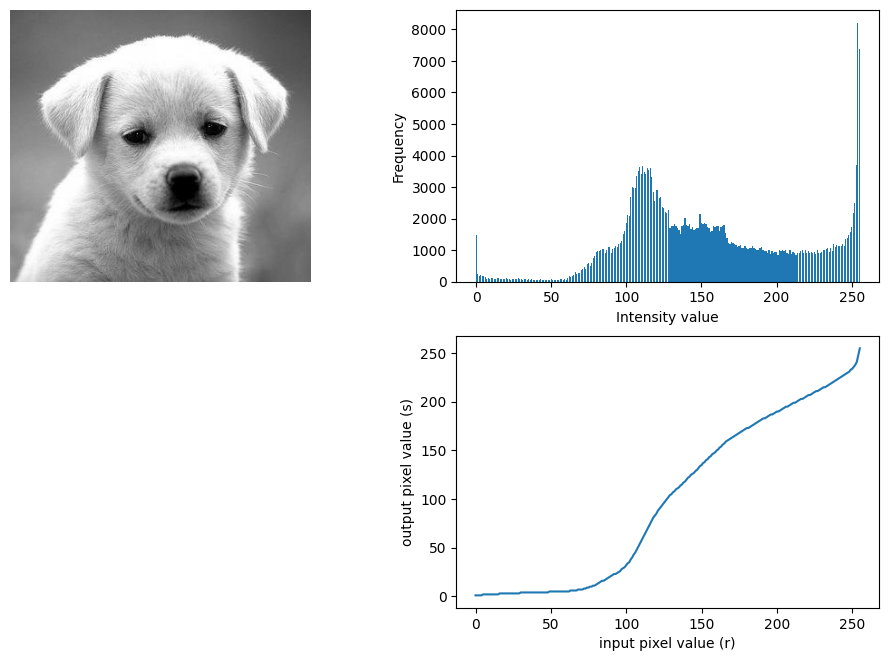

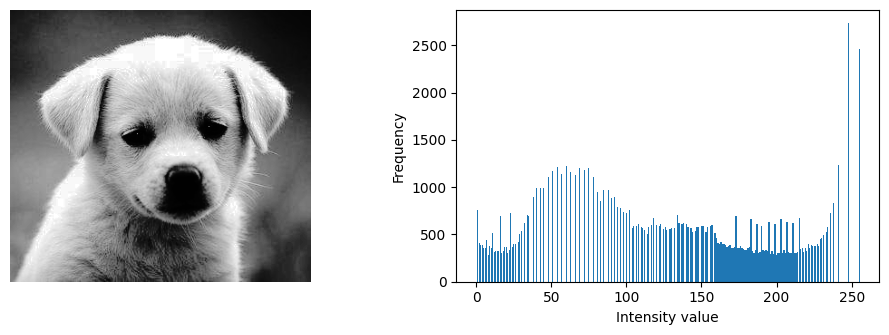

In [188]:
histeq_img2 = histogram(img2_eq, 256)

plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(3,2,2)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

plt.subplot(3,2,4)
plt.plot(range(256), img2_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.figure(figsize=(12,12))

plt.subplot(3,2,5)
plt.imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img2)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

Note that, for some images, the equalisation produces exactly what was expected - to better distribute the graylevels, the visual effect may not be pleasant. In this case, the dog became too dark, and the background too.

Therefore, the histogram equalisation must be used only when knowing its effects would produced the desired enhancement.